# **Домашнее задание 2**

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())
    

def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [5]:
X_norm = X.copy().astype(np.float64)
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [6]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [7]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        # if i % (iterations / 10) == 0:
        #     print(f'Iter: {i}, weights: {W}, error {err}')
    
    # print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W


def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

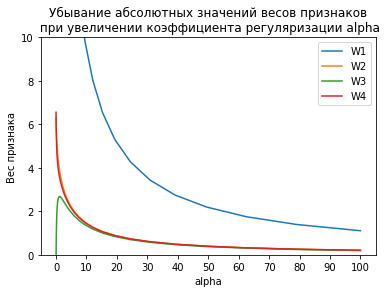

In [44]:
n = 50
train_amount = 5
train_X = X[:train_amount]
train_y = y[:train_amount]
test_X = X[train_amount:]
test_y = y[train_amount:]

coeffs = np.zeros((n, train_X.shape[1]))
alpha_list = np.logspace(-3, 2, n)

for i, val in enumerate(alpha_list):
    coeffs[i, :] = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=0.01, reg=val)

for i in range(train_X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha')
plt.xticks(np.arange(0, 101, 10))
plt.ylim(0, 10)
plt.legend(('W1', 'W2', 'W3', 'W4'))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

Вывод: веса 1го и 3го признаков примерно одинаковые. С увеличением коэффициента регуляризации вес 2го признака становится примерно равным весам 1го и 3го признаков.

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [9]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W / abs(W) # градиент регуляризации                #ИЗМЕНЕНИЕ
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [10]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-1, reg=1e-4)

Iter: 0, weights: [12.09542105  2.08891508  2.98653665  1.45203264], error 3236.1502284278295
Iter: 500, weights: [56.49995     6.30285762 -0.35563124  6.57090844], error 24.904618979480926
Iter: 1000, weights: [56.49995     6.30289122 -0.35579345  6.57104233], error 24.904618940997295
Iter: 1500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.904618940996173
Iter: 2000, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.904618940996166
Iter: 2500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.904618940996166
Iter: 3000, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.904618940996166
Iter: 3500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.904618940996166
Iter: 4000, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.904618940996166
Iter: 4500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.904618940996166
Final MSE: 24.904618940996166


array([56.49995   ,  6.30289122, -0.35579346,  6.57104233])